1. Plot Zipf's law
----

In [1]:
reset -fs

In [2]:
from collections import Counter

from nltk.corpus import genesis

In [3]:
word_counts = Counter(genesis.words())

In [4]:
import operator

In [5]:
word_counts_sorted = sorted(word_counts.items(), 
                            key=operator.itemgetter(1),
                            reverse=True)

In [6]:
assert word_counts_sorted[0]  == (',', 22643)
assert word_counts_sorted[1]  == ('.', 11069)
assert word_counts_sorted[2]  == ('the', 4642)

In [8]:
sample = word_counts_sorted[:15]
sample

[(',', 22643),
 ('.', 11069),
 ('the', 4642),
 ('and', 4368),
 (':', 3636),
 (';', 3589),
 ("'", 3198),
 ('de', 3160),
 ('of', 2824),
 ('a', 2372),
 ('e', 2353),
 ('und', 2010),
 ('och', 1839),
 ('to', 1805),
 ('in', 1625)]

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

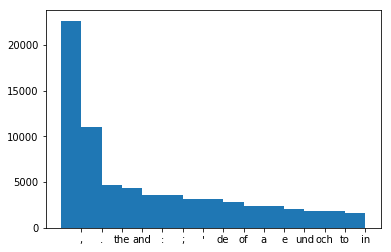

In [10]:
labels, values = zip(*sample)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [11]:
# Remove puncation

In [12]:
from string import punctuation

In [13]:
sample_clean = [item for item in sample if not item[0] in punctuation]

In [14]:
sample_clean

[('the', 4642),
 ('and', 4368),
 ('de', 3160),
 ('of', 2824),
 ('a', 2372),
 ('e', 2353),
 ('und', 2010),
 ('och', 1839),
 ('to', 1805),
 ('in', 1625)]

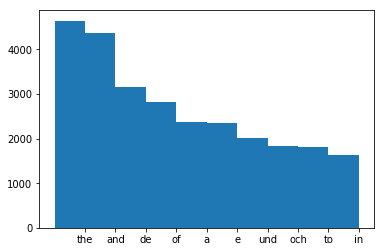

In [15]:
labels, values = zip(*sample_clean)
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

TODO: Plot word frequency against word rank

In [20]:
freq_rank = ((index+1, item[1]) for index, item in enumerate(word_counts_sorted) if not item[0] in punctuation)
# list(freq_rank)[:5]

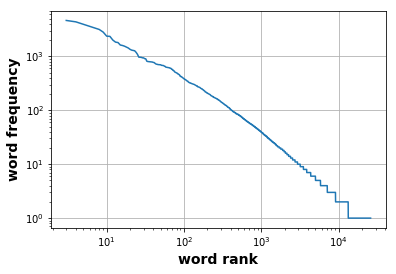

In [21]:
ranks, frequency = zip(*freq_rank)
plt.loglog(ranks, frequency)
plt.xlabel('word rank', fontsize=14, fontweight='bold')
plt.ylabel('word frequency', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [22]:
# Fit linear model
coeffs = np.polyfit(np.log(ranks), np.log(frequency), deg=1) #Note: Log transform data
poly = np.poly1d(coeffs) 

yfit = lambda x: np.exp(poly(np.log(ranks))) # Define a function that exponentiates the polynomial

# Source: http://stackoverflow.com/questions/18760903/fit-a-curve-using-matplotlib-on-loglog-scale

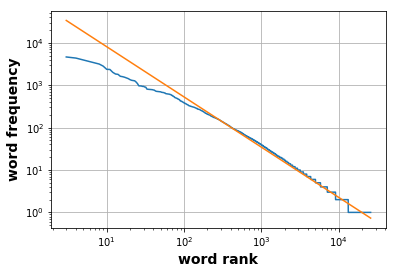

In [27]:
plt.loglog(ranks, frequency) # Plot data
plt.loglog(ranks, yfit(ranks)) # Plot fit line
plt.xlabel('word rank', fontsize=14, fontweight='bold')
plt.ylabel('word frequency', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [28]:
import seaborn as sns

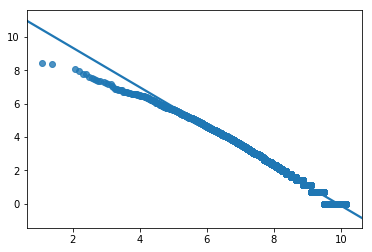

In [26]:
sns.regplot(np.log(ranks), np.log(frequency));

<br>
<br> 
<br>

----